# Rentrenamiento del modelo CNN

Se tuvo que tomar la decisión de rentrenar los modelos (que fueron entrenados en marzo del 2023 y de donde se obtuvieron estos tres mejores modelos) con la finalidad de generar los subconjuntos de las clases predichas del conjunto Testing, manteniendo la misma distribución porque son conjuntos de datos fijos (Training, Testing, Validation) con las mismas configuraciones con las que se implemento en marzo del 2023.

## Instación de la librería keras-preprocessing

In [ ]:
!pip install keras_preprocessing

In [ ]:
!pip install Tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 4.5 MB/s eta 0:00:00


## Importación de librerías

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import sys
import csv
import re
from tqdm.notebook import tqdm
import sys
import csv
import io
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Fijar semillas

Para asegurar el mitigar posibles sesgos fijamos las semillas antes de cualquier operación que involucre aleatoriedad que incluye tanto el pre-procesamiento como el entrenamiento del modelo. Esto asegurará que cualquier aleatoriedad en el proceso ya sea en la inicialización de pesos o en el procesamiento del tokenizador sea controlada y reproducible.

In [ ]:
import random
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Cargar los conjuntos de datos fijos

### Corpus completo (4014 registros)

In [ ]:
#Cargar el conjunto training con atributos recuperados
# Training_3130.xlsx'
from google.colab import files
uploaded = files.upload()

Saving sgc_4014.xlsx to sgc_4014.xlsx


In [ ]:
#Asignar a una variable el contenido del conjunto de datos
sgc = io.BytesIO(uploaded['sgc_4014.xlsx'])
df_sgc4014 = pd.read_excel(sgc)
df_sgc4014.head()

,Tweet_Checked,Id,Fecha,Clase_Argumento,Word_quantity,Long_text
0,elecciones2021 apurímac respaldo a candidato p...,2882,2021-04-11,1,15,0
1,elecciones2021 pueblo libre adultos mayores aú...,1795,2021-06-06,1,35,1
2,elecciones2021 si fuiste elegido miembro de me...,3113,2021-04-09,1,23,0
3,elecciones2021 es importante mantenerte inform...,3305,2021-04-05,1,36,1
4,nuestros partidos políticos están tan dividido...,2878,2021-04-12,1,32,1


In [ ]:
df_sgc4014.shape

(4014, 6)

In [ ]:
df_sgc4014.Clase_Argumento.value_counts()

,count
Clase_Argumento,
0,2057
1,1957


Conjunto Training (3130 registros)

In [ ]:
#Cargar el conjunto training con atributos recuperados
# Training_3130.xlsx'
from google.colab import files
uploaded = files.upload()

Saving Training_3130.xlsx to Training_3130.xlsx


In [ ]:
#Asignar a una variable el contenido del conjunto de datos
training = io.BytesIO(uploaded['Training_3130.xlsx'])
df_training = pd.read_excel(training)
df_training.head()

,Tweet_Checked,Id,Fecha,Clase_Argumento,Word_quantity,Long_text
0,elecciones2021 apurímac respaldo a candidato p...,2882,2021-04-11,1,15,0
1,elecciones2021 pueblo libre adultos mayores aú...,1795,2021-06-06,1,35,1
2,elecciones2021 si fuiste elegido miembro de me...,3113,2021-04-09,1,23,0
3,elecciones2021 es importante mantenerte inform...,3305,2021-04-05,1,36,1
4,nuestros partidos políticos están tan dividido...,2878,2021-04-12,1,32,1


In [ ]:
df_training.shape

(3130, 6)

In [ ]:
df_training.Clase_Argumento.value_counts()

,count
Clase_Argumento,
0,1604
1,1526


### Conjunto Validation (200 registros)

In [ ]:
#Cargar el conjunto training con atributos recuperados
# Validation_200.xlsx'
from google.colab import files
uploaded = files.upload()

Saving Validation_200.xlsx to Validation_200.xlsx


In [ ]:
#Asignar a una variable el contenido del conjunto de datos
validation = io.BytesIO(uploaded['Validation_200.xlsx'])
df_validation = pd.read_excel(validation)
df_validation.head()

,Tweet_Checked,Id,Fecha,Clase_Argumento,Word_quantity,Long_text
0,pedrocastillote estoy casi seguro q le ingresó...,1948,2021-12-17,1,46,1
1,paridad y alternancia desde defensoriaperu des...,465,2020-07-24,1,32,1
2,oficinas descentralizada de procesos electoral...,3202,2021-04-07,1,29,0
3,jurado nacional de elecciones registró 25 inci...,212,2020-11-29,1,16,0
4,video panorama elecciones2021 hernando de soto...,175,2020-12-07,1,14,0


In [ ]:
df_validation.shape

(200, 6)

In [ ]:
df_validation.Clase_Argumento.value_counts()

,count
Clase_Argumento,
0,102
1,98


### Conjunto Testing (684 registros)

In [ ]:
#Cargar el conjunto testing con atributos recuperados
# Testing_684.xlsx'
from google.colab import files
uploaded = files.upload()

Saving Testing_684.xlsx to Testing_684.xlsx


In [ ]:
#Asignar a una variable el contenido del conjunto de datos
testing = io.BytesIO(uploaded['Testing_684.xlsx'])
df_testing = pd.read_excel(testing)
df_testing.head()

,Tweet_Checked,Id,Fecha,Clase_Argumento,Word_quantity,Long_text
0,lima sur desde defensoriaperu demandamos respe...,191,2020-12-03,1,29,0
1,elecciones2021 el 10 de febrero es la fecha lí...,1122,2021-01-02,1,20,0
2,onpeinforma a partir de ahora compartiremos en...,2103,2021-04-13,1,28,0
3,último los titulares del jne la onpeoficial y ...,3639,2021-03-24,1,27,0
4,elecciones2021 lescano dice que sube en encues...,1228,2021-03-01,1,14,0


In [ ]:
df_testing.shape

(684, 6)

In [ ]:
df_testing.Clase_Argumento.value_counts()

,count
Clase_Argumento,
0,351
1,333


### Gráficamente: Tres conjuntos de datos

###### Distribution of training data #####


<Axes: ylabel='count'>

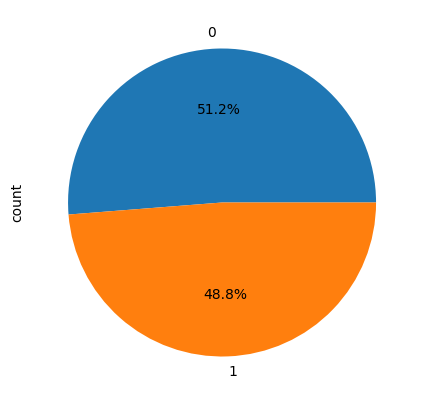

In [ ]:
import matplotlib.pyplot as plt

print("###### Distribution of training data #####")
fig, ax = plt.subplots(1, 1, figsize=(5,5))
df_training['Clase_Argumento'].value_counts().plot.pie(autopct = '%1.1f%%')#, labels=labels)

###### Distribution of validation data #####


<Axes: ylabel='count'>

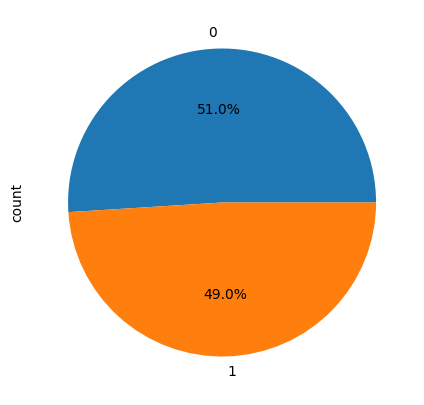

In [ ]:
print("###### Distribution of validation data #####")
fig, ax = plt.subplots(1, 1, figsize=(5,5))
df_validation['Clase_Argumento'].value_counts().plot.pie(autopct = '%1.1f%%')#, labels=labels)

###### Distribution of testing data #####


<Axes: ylabel='count'>

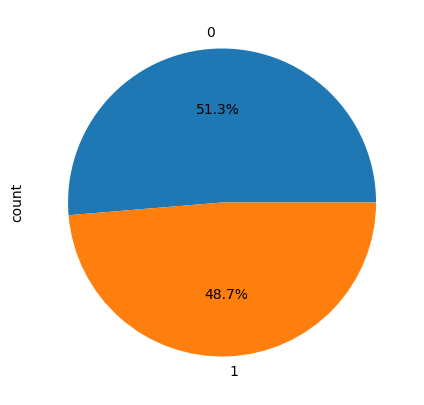

In [ ]:
print("###### Distribution of testing data #####")
fig, ax = plt.subplots(1, 1, figsize=(5,5))
df_testing['Clase_Argumento'].value_counts().plot.pie(autopct = '%1.1f%%')#, labels=labels)

Con estos porcentajes de distribución para cada uno de los tres conjuntos de datos se demuestra que se está trabajando con la misma distribución de datos con la que se entrenó los modelos en marzo del 2023.

## Vectorización de la data

### Inicializamos los parámetros globales

In [ ]:
max_nb_words = 60000
max_features = 11000 #Máximo número de palabras que formaran parte del diccionario
maxlen = 500 #Nro de tokens a partir del cual crearemos la secuencia del tweet
emb_dim = 200 #Tamaño del vector embedding

### Inicializamos el tokenizador para todo el corpus

In [ ]:
tokenizer = Tokenizer(num_words=max_nb_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_sgc4014['Tweet_Checked'].values)# tokenizer on whole training, testing and validation data
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9984 unique tokens.


### Convertir a secuencias y aplicar padding

In [ ]:
train_sequences = tokenizer.texts_to_sequences(df_training['Tweet_Checked'].values)
train_padded = pad_sequences(train_sequences, maxlen=maxlen)
print('Shape del tensor', train_padded.shape)

test_sequences = tokenizer.texts_to_sequences(df_testing['Tweet_Checked'].values)
test_padded = pad_sequences(test_sequences, maxlen=maxlen)
print('Shape del tensor', test_padded.shape)

val_sequences = tokenizer.texts_to_sequences(df_validation['Tweet_Checked'].values)
val_padded = pad_sequences(val_sequences, maxlen=maxlen)
print('Shape del tensor', val_padded.shape)

Shape del tensor (3130, 500)
Shape del tensor (684, 500)
Shape del tensor (200, 500)


In [ ]:
#Número total de palabras en el vocabulario
print(f"Tamaño del vocabulario: {len(tokenizer.word_index)}")

#Ver las primeras 10 palabras del vocabulario
print(list(tokenizer.word_index.items())[:10])

Tamaño del vocabulario: 9984
[('de', 1), ('la', 2), ('el', 3), ('elecciones2021', 4), ('en', 5), ('a', 6), ('y', 7), ('las', 8), ('que', 9), ('para', 10)]


In [ ]:
#Verificar la secuencias tokenizadas
print("Ejemplo de secuencia de entrenamiento", train_sequences[:2])
print("Ejemplo de secuencia con padding", train_padded[:2])

Ejemplo de secuencia de entrenamiento [[4, 1414, 690, 6, 29, 58, 42, 14, 32, 1, 488, 111, 581, 1, 514], [4, 76, 77, 647, 384, 533, 17, 310, 369, 22, 112, 15, 40, 2106, 9, 647, 384, 16, 327, 4906, 2584, 8, 4907, 10, 595, 22, 40, 5, 20, 4908, 1, 2, 765, 4909, 1177]]
Ejemplo de secuencia con padding [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   

### Extraer las etiquetas (Clase_Argumento) para cada conjunto

In [ ]:
Y_train = pd.get_dummies(df_training['Clase_Argumento']).values
print('Shape del tensor Y_train', Y_train.shape)

Y_test = pd.get_dummies(df_testing['Clase_Argumento']).values
print('Shape del tensor Y_test', Y_test.shape)

Y_val = pd.get_dummies(df_validation['Clase_Argumento']).values
print('Shape del tensor Y_val', Y_val.shape)

Shape del tensor Y_train (3130, 2)
Shape del tensor Y_test (684, 2)
Shape del tensor Y_val (200, 2)


## Cargar los embedding con Glove de SBWC

Vista que este es un rentrenamiento de los tres mejores modelos, se usará el embedding que se uso en marzo del 2023 a fin de garantizar su replicación sin sesgos o variaciones que podrían eventualmente cambiar los resultados. Por lo que se cargará desde mi google drive.

In [ ]:
#Para conectar a mi Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
embedding_vectors = {}

with open('/content/gdrive/MyDrive/Tesis Doctoral PUCP/FASE II_CAUSAL METHODOLOGY/glove.twitter.27B.200d.txt', 'r', encoding='utf-8') as file:
  for row in file:
    values = row.split(' ')
    word = values[0]
    weights = np.asarray([float(val) for val in values[1:]])
    embedding_vectors[word] = weights

print(f"Tamaño del vocabulario en Glove: {len(embedding_vectors)}")

Tamaño del vocabulario en Glove: 1193515


In [ ]:
#initialize the embedding_matrix with zeros: Es necesario correrlo para que se ejecute la funcion "pretrained_embedding_layer"
emb_dim = 200 #200 es la dimensión del vector embedding SBWC
if max_nb_words is not None:
    vocab_len = max_nb_words
else:
    vocab_len = len(word_index)+1

embedding_matrix = np.zeros((vocab_len, emb_dim))

oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

        else:
            oov_count += 1
            oov_words.append(word)
#Check some of the out of vocabulary words
print(f'A few out of valubulary words: {oov_words[0:5]}')
print(f'{oov_count} out of {vocab_len} words were OOV.')

A few out of valubulary words: ['elecciones2021', 'nuevaconstitucion', '11', 'onpeoficial', 'jneperu']
1761 out of 60000 words were OOV.


Vemos que 1761 palabras OOV de 60,000 es un porcentaje pequeño, aproximadamente 2.9% por lo cual es aceptables para la mayoría de trabajos en NLP. Además los modelos CNN, CNN-LSTM, CNN-LSTM-MLP suelen manejar adecuadamente términos OOV debido a su capacidad de generalización y que ha sido demostrada en la primera etapa de entrenamiento.

## Implementación de los mejores modelos

In [ ]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Flatten
from keras.layers import Dropout, Input
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

from sklearn.metrics import confusion_matrix
from keras import initializers, layers, models, regularizers, constraints, optimizers
from keras.utils import to_categorical

#from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
import math

### Modelo CNN

Se mantuvo la misma configuración para mantener la consistencia de la investigación.

In [ ]:
#El tamaño del filtro se definió considerando el tamaño del vector embedding_matrix (200d)
def CNN_model(embedding_matrix):
    emb_dim = embedding_matrix.shape[1]

    cnn_model = Sequential()
    cnn_model.add(Embedding(vocab_len, emb_dim, weights=[embedding_matrix]))
    cnn_model.add(layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    cnn_model.add(layers.MaxPooling1D(5))
    cnn_model.add(layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    cnn_model.add(layers.GlobalMaxPooling1D())
    cnn_model.add(layers.Dense(2, activation='sigmoid'))
    cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    cnn_model.summary()
    return cnn_model

In [ ]:
cnn_model=CNN_model(embedding_matrix)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      12,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,000,000 (45.78 MB)

 Trainable params: 12,000,000 (45.78 MB)

 Non-trainable params: 0 (0.00 B)

No es necesario preocuparte por los ?s porque cuando se llame al fit() para entrenar con los datos entonces Keras construirá automáticamente el modelo y establecerá las dimensiones para las capas.

In [ ]:
##Global variables
batch_size = 256 #Se obtiene mejores resultados con este valor de batch_size
epochs  = 25

In [ ]:
#Para detener el entrenamiento del modelo en caso el 'loss' no disminuya luego de mínimo 5 epochos sucesivos
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback

detener = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=5)

In [ ]:
#fit the model
history = cnn_model.fit(train_padded, np.asarray(Y_train), validation_data=(val_padded, np.asarray(Y_val)), batch_size = batch_size, epochs = epochs, callbacks=[detener])

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.5077 - loss: 1.3717 - val_accuracy: 0.6900 - val_loss: 0.5994
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.6289 - loss: 0.6257 - val_accuracy: 0.6800 - val_loss: 0.5928
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.7832 - loss: 0.5283 - val_accuracy: 0.7800 - val_loss: 0.5228
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.8485 - loss: 0.4490 - val_accuracy: 0.7800 - val_loss: 0.4785
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8826 - loss: 0.3706 - val_accuracy: 0.7850 - val_loss: 0.4391
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9198 - loss: 0.2928 - val_accuracy: 0.8000 - val_loss: 0.3762
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.9524 - loss: 0.2219 - val_accuracy: 0.8300 - val_loss: 0.3420
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9726 - loss: 0.1631 - val_accuracy: 0.8400 - val_loss:

In [ ]:
# Función para los RESULTADOS: Accuracy respecto al conjunto testing que no ha sido entrenado por el modelo
def train_test_accuracy(model,train_padded,Y_train,test_padded,Y_test):
  train_results = model.evaluate(train_padded, np.asarray(Y_train), verbose=0, batch_size=256)
  test_results = model.evaluate(test_padded, np.asarray(Y_test), verbose=0, batch_size=256)
  print(f'Train accuracy: {train_results[1] * 100:0.2f}')
  print(f'Test accuracy: {test_results[1] * 100:0.2f}')

In [ ]:
#RESULTADOS
print("Obtained results with CNN Model")
train_test_accuracy(cnn_model, train_padded, Y_train, test_padded, Y_test)

Obtained results with CNN Model
Train accuracy: 99.78
Test accuracy: 85.53


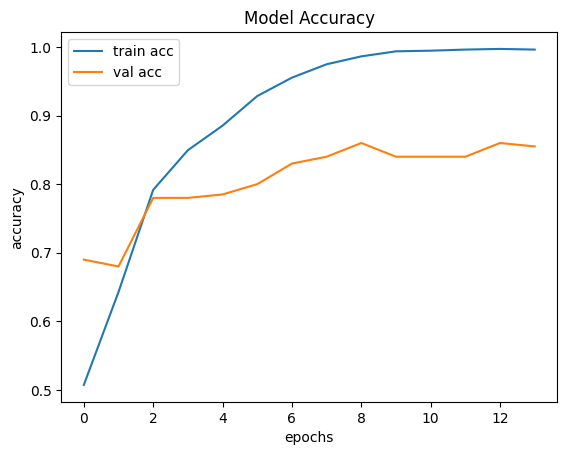

In [ ]:
#plot accuracy
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train acc', 'val acc'], loc='upper left')
plt.show()

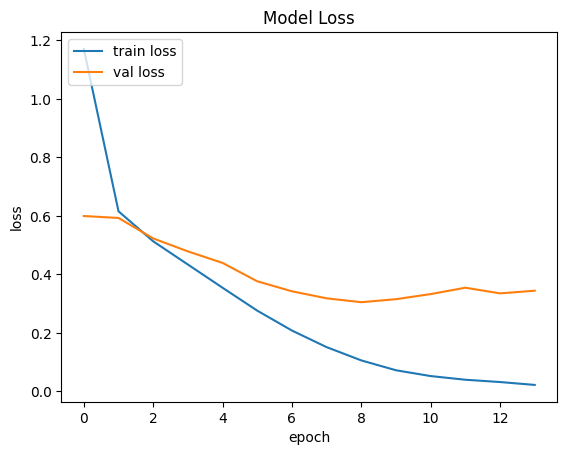

In [ ]:
#plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

In [ ]:
#Función para calcular la PREDICCION con el modelo entrenado usando el conjunto datos testing
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

def reporte_clasificacion(model,test_padded,Y_test):
  model = model
  y_actuals = np.argmax(Y_test, axis=1) # Convertir Y_test a etiquetas

  #encoder.inverse_transform(a)
  y_preds = model.predict(test_padded)

  prediction_ = np.argmax(y_preds, axis=1) #Convertir predicciones a etiquetas

  y_preds = prediction_
  target_names = ['0', '1']
  report = classification_report(y_actuals.tolist(), y_preds.tolist(), target_names=target_names)
  print(report)
  print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_actuals.tolist(), y_preds.tolist())))

  #Calcular la matriz de confusión
  cm = confusion_matrix(y_actuals, prediction_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

  #Visualizar y guardar la matriz de confusión
  disp.plot(cmap='Blues')
  plt.title("Matriz de confusión - Testing")
  plt.savefig("Matriz_confusion_testing.png")
  plt.show()

  #Decodificar las secuencias vectorizadas de los textos a los textos originales
  X_test_texts = [' '.join(tokenizer.index_word.get(word, '') for word in sequence if word !=0) for sequence in test_padded]

  #Crear el dataframe con las predicciones
  df_predictions_cnn = pd.DataFrame({
      'Texto': X_test_texts,
      'Etiqueta Real': y_actuals,
      'Etiqueta Predicha': prediction_
  }

  )

  #Guardar el dataframe a un archivos csv
  df_predictions_cnn.to_csv('predictions_testing_cnn.csv', index=False)
  print("Predicciones guardadas en 'predictions_testing_cnn.csv'")

  return df_predictions_cnn

Classification Report: LSTM Model
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       351
           1       0.85      0.85      0.85       333

    accuracy                           0.86       684
   macro avg       0.86      0.86      0.86       684
weighted avg       0.86      0.86      0.86       684

accuracy: 0.855


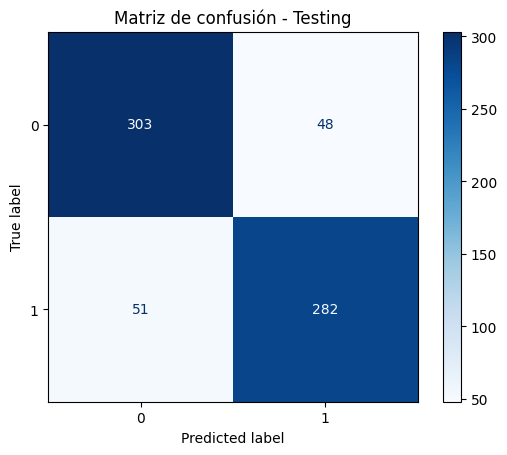

In [ ]:
#PREDICCION: Classification report
print("Classification Report: LSTM Model")
reporte_clasificacion(cnn_model,test_padded,Y_test)

In [ ]:
#Guardamos los pesos del modelo
cnn_model.save_weights('pesos_cnn_rentrenado.weights.h5')

#Guardamos el modelo completo
cnn_model.save('modelo_cnn_rentrenado.h5')

In [ ]:
#Guardamos el modelo completo
cnn_model.save('modelo_cnn_rentrenado.keras')

#### Guardar las predicciones Testing_CNN en un dataframe

In [ ]:
print(f'Longitud de test_padded: {len(test_padded)}')
print(f'Longitud de Y_test: {len(Y_test)}')
print(f'Longitud de predicted_classes: {len(predicted_classes)}')

Longitud de test_padded: 684
Longitud de Y_test: 684
Longitud de predicted_classes: 684


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       351
           1       0.85      0.85      0.85       333

    accuracy                           0.86       684
   macro avg       0.86      0.86      0.86       684
weighted avg       0.86      0.86      0.86       684

accuracy: 0.855


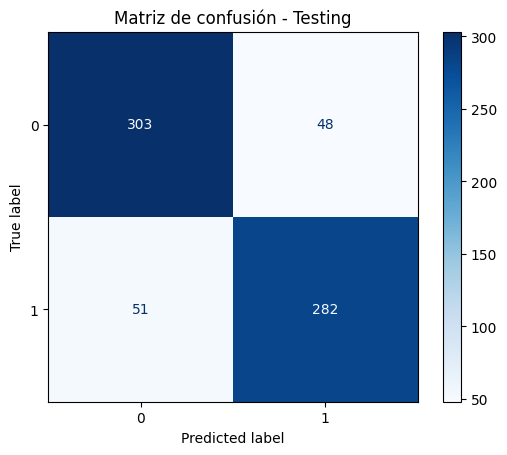

Predicciones guardadas en 'predictions_testing_cnn.csv'
                                               Texto  Etiqueta Real  \
0  lima sur desde defensoriaperu demandamos respe...              1   
1  elecciones2021 el 10 de febrero es la fecha lí...              1   
2  onpeinforma a partir de ahora compartiremos en...              1   
3  último los titulares del jne la onpeoficial y ...              1   
4  elecciones2021 lescano dice que sube en encues...              1   

   Etiqueta Predicha  
0                  1  
1                  1  
2                  1  
3                  1  
4                  0  


In [ ]:
df_resultados_cnn = reporte_clasificacion(cnn_model, test_padded, Y_test)
print(df_resultados_cnn.head())